# <font color='#0000CD'>Web vs. Mobile App Engagement Analysis for E-Commerce Sales Optimization</font>

## Construction, Training, Evaluation and Model Selection for Regression

### Objective:
Help the company decide whether to invest in improving the website or the mobile app by analyzing customer engagement data.

### Problem Statement & Data Source:
An e-commerce company sells products through its website and mobile app. Customers can create accounts on either platform and log in to make purchases. The system records the amount of time each customer spends logged in, either on the website or the mobile app.

Given budget constraints, the company can only invest in either the website or the mobile app to enhance customer experience. The task is to analyze the data and provide recommendations on where to focus investment for increasing engagement, logged-in time, and consequently, sales.



In [1]:
# Python version
from platform import python_version
print('Python Version:', python_version())

Python Version: 3.9.7


In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split # Split data into training and testing
from sklearn.preprocessing import StandardScaler     # Standardization
from sklearn.linear_model import LinearRegression    # Linear regression algorithm
from sklearn.linear_model import Ridge               # Ridge algorithm
from sklearn.linear_model import Lasso               # lasso algorithm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
sns.set_style('whitegrid')
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Loading the dataset

In [3]:
data = pd.read_csv('data/dataset.csv')

In [4]:
# Shape
data.shape

(500, 5)

In [5]:
# Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   customer_registration_time         500 non-null    float64
 1   average_number_clicks_per_session  500 non-null    float64
 2   total_time_logged_app              500 non-null    float64
 3   total_time_logged_website          500 non-null    float64
 4   total_value_spent                  500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


In [6]:
data.sample(10)

,customer_registration_time,average_number_clicks_per_session,total_time_logged_app,total_time_logged_website,total_value_spent
163,4.716105,33.701605,11.564022,37.673210,576.802547
83,3.392050,33.925297,11.588655,35.252242,483.673308
236,2.566640,33.459477,11.388613,37.909139,434.021700
331,1.810080,34.394327,12.807752,38.551030,467.427848
362,1.200484,32.495419,12.968326,38.296110,368.654785
19,3.746573,33.237660,13.566160,36.417985,573.847438
262,3.678589,34.117567,11.591872,37.743620,519.372977
224,2.972271,32.497198,12.832803,37.679245,493.719193
467,4.158215,33.918844,12.428737,37.305362,565.994363
299,4.029454,35.530904,11.379257,36.636104,574.747220


## Exploratory Data Analysis

In [7]:
data.columns

Index(['customer_registration_time', 'average_number_clicks_per_session',
       'total_time_logged_app', 'total_time_logged_website',
       'total_value_spent'],
      dtype='object')

In [8]:
# Correlation (table)
data.corr()

,customer_registration_time,average_number_clicks_per_session,total_time_logged_app,total_time_logged_website,total_value_spent
customer_registration_time,1.000000,0.060247,0.029143,-0.047582,0.809084
average_number_clicks_per_session,0.060247,1.000000,-0.027826,-0.034987,0.355088
total_time_logged_app,0.029143,-0.027826,1.000000,0.082388,0.499328
total_time_logged_website,-0.047582,-0.034987,0.082388,1.000000,-0.002641
total_value_spent,0.809084,0.355088,0.499328,-0.002641,1.000000


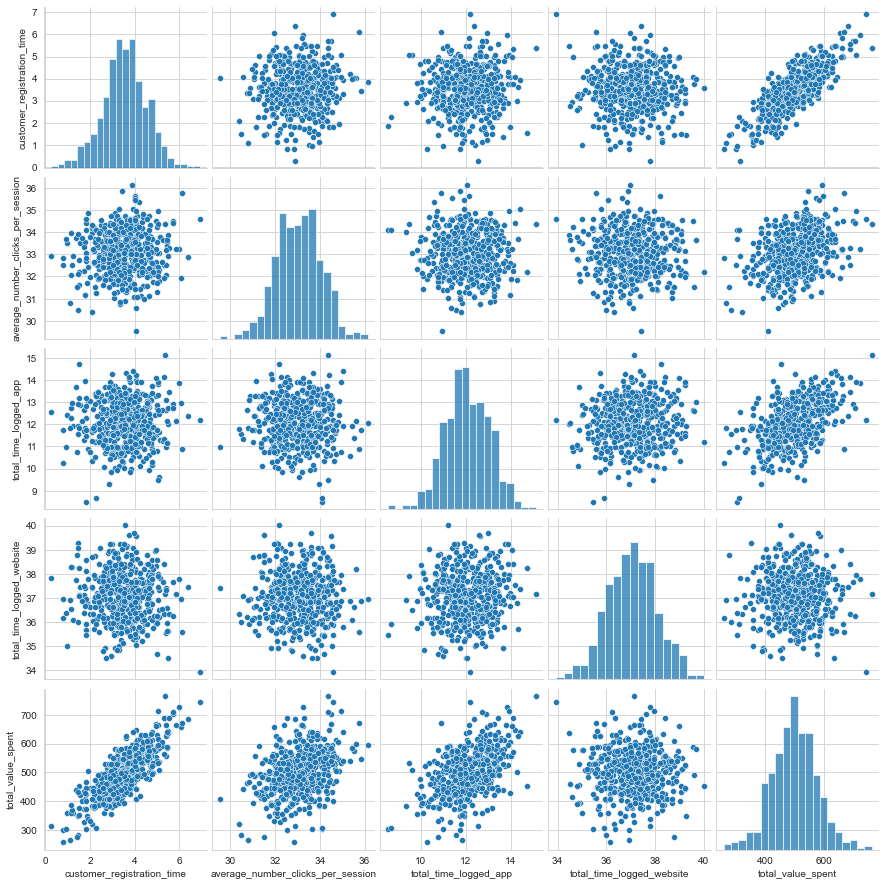

In [9]:
# Correlation (visual)
sns.pairplot(data)

#### In regression, we want the predictor variables to have a good correlation with the target variable. However, we do not want a high correlation between the predictor variables, reinforcing too much information and leaving the model biased

<Figure size 1296x864 with 0 Axes>

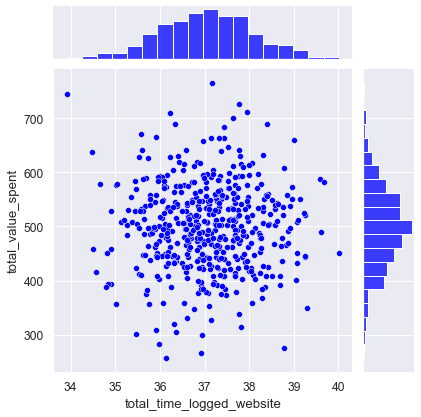

In [10]:
# Plot
plt.figure(figsize = (18, 12))
sns.set(font_scale = 1.1)
sns.jointplot(data = data, 
              x = 'total_time_logged_website', 
              y = 'total_value_spent',
              color = 'blue')

#### Looking at the histograms, we can see that the data is normally distributed (follows a normal distribution).

In [11]:
# Correlation
data[['total_time_logged_website', 'total_value_spent']].corr()

,total_time_logged_website,total_value_spent
total_time_logged_website,1.000000,-0.002641
total_value_spent,-0.002641,1.000000


#### Does not appear to be a correlation between the time logged on the website and the amount spent by customers.

### Analysis 2 - Relation between app time and value spent

<Figure size 1296x864 with 0 Axes>

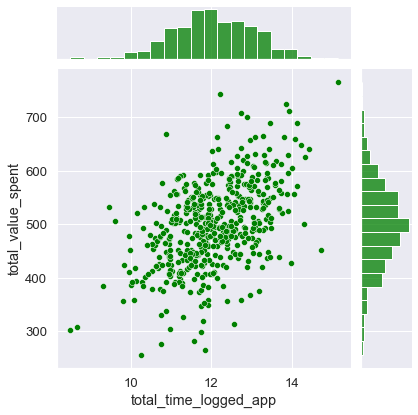

In [12]:
# Plot
plt.figure(figsize = (18, 12))
sns.set(font_scale = 1.2)
sns.jointplot(data = data, 
              x = 'total_time_logged_app', 
              y = 'total_value_spent', 
              color = 'green')

#### Data is normally distributed.

There appears to be a positive correlation between the two variables

In [13]:
# Correlation
data[['total_time_logged_app', 'total_value_spent']].corr()

,total_time_logged_app,total_value_spent
total_time_logged_app,1.000000,0.499328
total_value_spent,0.499328,1.000000


The data has a moderate positive correlation. We can deduce that the total amount spent monthly tends to increase if the customer spends more time logged into the app.

### Analysis 3 - Relation between app time and registration time

<Figure size 1296x864 with 0 Axes>

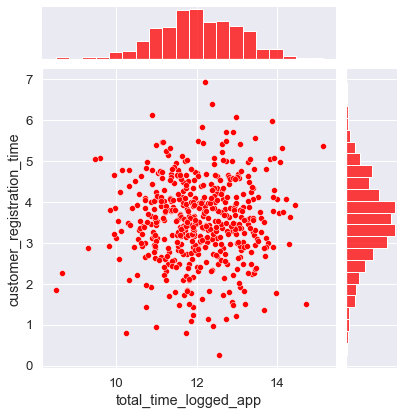

In [14]:
# Plot
plt.figure(figsize = (18, 12))
sns.set(font_scale = 1.2)
sns.jointplot(data = data, 
              x = 'total_time_logged_app', 
              y = 'customer_registration_time', 
              color = 'red')

#### Data is normally distributed.

From the scatterplot we can see that the data is very dense in the middle of the graph, with no clear correlation.
But we can deduce that there are many customers who have been members for 3-4 years and spend approximately 11.5 to 12.5 minutes on the app.

### Analysis 4 - Relation between registration time and value spent

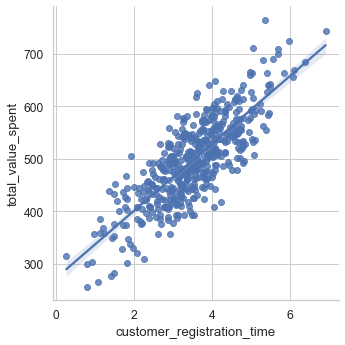

In [15]:
# Plot
sns.set(font_scale = 1.1)
sns.set_style('whitegrid')
sns.lmplot(y = "total_value_spent", x = "customer_registration_time", data = data)

In [16]:
# Correlation
data[['customer_registration_time', 'total_value_spent']].corr()

,customer_registration_time,total_value_spent
customer_registration_time,1.000000,0.809084
total_value_spent,0.809084,1.000000


From the lmplot and the demo coefficient, we can see that the registration time and the total amount spent have a strong positive projection, that is, as the customer becomes older (longer registration time), the total amount Spending by customers also increases.  

### The company is concerned about updating the website or an application, but perhaps it should be concerned about retaining customers, because the older the customer, the more they buy

## Data Pre-Processing for Building Machine Learning Models

In [17]:
data.columns

Index(['customer_registration_time', 'average_number_clicks_per_session',
       'total_time_logged_app', 'total_time_logged_website',
       'total_value_spent'],
      dtype='object')

In [18]:
# Input variables (predictor variables)
X = data[['customer_registration_time', 
           'average_number_clicks_per_session',
           'total_time_logged_app', 
           'total_time_logged_website']]

In [19]:
# Output variable (target variable or target)
y = data['total_value_spent']

In [20]:
# Splitting into training and testing data
X_training, X_test, y_training, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [21]:
len(X_training)

350

In [22]:
len(X_test)

150

### Standardization

In [23]:
scaler = StandardScaler()

In [24]:
scaler.fit(X_training)

StandardScaler()

In [25]:
X_training = scaler.transform(X_training)

In [26]:
X_test = scaler.transform(X_test)

In [27]:
X_training[:5]

array([[-0.21902935, -0.23735512,  0.33914084,  0.92765292],
       [ 1.8073082 ,  0.09393489,  1.05266311,  0.2388907 ],
       [-0.00962736, -0.47064535, -0.26005737,  0.81461639],
       [-0.06171807, -0.23157636, -0.19229742, -0.26198867],
       [-2.03669802, -1.54671013, -1.27813419,  1.65800995]])

In [28]:
X_test[:5]

array([[-0.74134552,  0.35042401,  1.32428694,  0.85663193],
       [ 0.51634261,  0.33850011,  1.36472848,  0.1071885 ],
       [ 1.22462847, -0.84278168,  1.70184401,  0.88678948],
       [ 0.48199668, -0.30436824, -0.65228214, -1.76956776],
       [ 1.88519232, -0.14493923,  0.70658414, -1.44006612]])

### Construction, Training and Evaluation of Model 1 with Linear Regression (Benchmark)

**x** = input variable  
**y** = output variable  
algorithm learns the relationship between the points of x and y and then gives us an approximation of b0 and b1  

as we have 4 predictor variables (4 values of X) we will have multiple linear regression  
**b1 (Slope)** for each input variable  
**b0** single coefficient for every equation  

error rate = observed value of y - predicted value of y



![title](images/linear1.png)

![title](images/linear2.png)

![title](images/linear3.png)

In [29]:
# Create the model
model_v1 = LinearRegression()

In [30]:
# Training
model_v1.fit(X_training, y_training)

LinearRegression()

In [31]:
print('Coefficients: \n', model_v1.coef_)

Coefficients: 
 [63.74220716 26.23901606 38.57185551  0.6847366 ]


In [32]:
# Coefficients of the predictor variables
df_coef = pd.DataFrame(model_v1.coef_, X.columns, columns = ['Coefficient'])
df_coef

,Coefficient
customer_registration_time,63.742207
average_number_clicks_per_session,26.239016
total_time_logged_app,38.571856
total_time_logged_website,0.684737


### Model Evaluation

In [33]:
# Predictions with test data
pred_v1 = model_v1.predict(X_test)

In [34]:
pred_v1[:10]

array([513.06429807, 593.96597774, 621.6550031 , 495.82353395,
       642.08919639, 615.61800045, 592.1273355 , 493.61084354,
       457.58835597, 532.03644608])

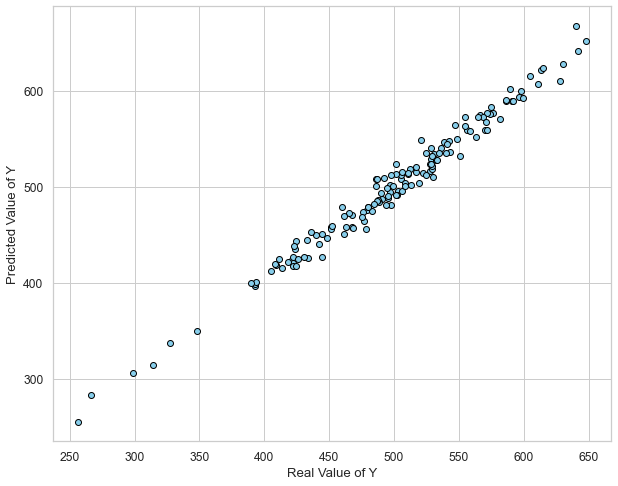

In [35]:
# Plot
plt.figure(figsize = (10,8))
plt.scatter(x = y_test, y = pred_v1, color = 'skyblue', edgecolors = 'black')
plt.xlabel('Real Value of Y')
plt.ylabel('Predicted Value of Y');

We can see that there is a very strong correlation between the predicted y's and the actual y's in the test data. **This means we have a very good model.**

### Metrics

In [36]:
data['total_value_spent'].mean()

499.31403826079975

In [37]:
data['total_value_spent'].min()

256.6705823

In [38]:
data['total_value_spent'].max()

765.5184619

In [39]:
# MAE - Mean Absolute Error
mean_absolute_error(y_test, pred_v1)

7.762418645778977

#### MAE predicts that, on average, our model's predictions (of value spent) are wrong by approximately 7.76 reais, which is a small amount compared to the average amount spent per customer.

In [40]:
# MSE - Mean Squared Error
mean_squared_error(y_test, pred_v1)

94.9565430843866

In [41]:
# RMSE - Root Mean Square Error
np.sqrt(mean_squared_error(y_test, pred_v1))

9.744564797074654

#### RMSE predicts that, on average, our model variance (of value spent) is wrong by approximately 9.74, which is a small amount compared to the average amount spent per customer.

In [42]:
# Coefficient R2
r2_score(y_test, pred_v1)

0.9813622791776302

In [43]:
# Variance Explained
explained_variance_score(y_test, pred_v1)

0.9817449183428639

The model is able to explain 98% of the variance in the data, which is excellent.

The R2 coefficient of 98% and other metrics demonstrate that this is a very good model.

### Residuals

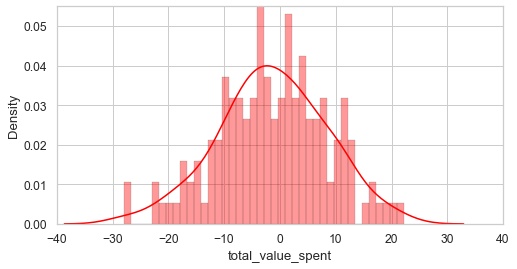

In [44]:
# Plot
plt.figure(figsize = (8,4))
ax = sns.distplot((y_test - pred_v1), # (Y real value - Y predicted value)
                  bins = 40, 
                  color = 'red', 
                  hist_kws = dict(edgecolor = 'black', linewidth = 0.3))
ax.set(xlim = (-40, 40))
ax.set(ylim = (0, 0.055));

The residuals are approximately normally distributed, which indicates a good fit of the model.

### Construction, Training and Evaluation of Model 2 with Ridge Regression

In [45]:
# Creates the model
model_v2 = Ridge(alpha = 1.0)

In [46]:
# Training
model_v2.fit(X_training, y_training)

Ridge()

In [47]:
print('Coefficients: \n', model_v2.coef_)

Coefficients: 
 [63.57245999 26.17198131 38.46758178  0.68013543]


In [48]:
# Predictor variables coefficients 
df_coef = pd.DataFrame(model_v2.coef_, X.columns, columns = ['coefficient'])
df_coef

,coefficient
customer_registration_time,63.572460
average_number_clicks_per_session,26.171981
total_time_logged_app,38.467582
total_time_logged_website,0.680135


In [49]:
# Test predictions
pred_v2 = model_v2.predict(X_test)
pred_v2[:10]

array([513.02461894, 593.71284026, 621.32208364, 495.83827761,
       641.71185412, 615.30802007, 591.87884788, 493.61867235,
       457.70805605, 531.9426755 ])

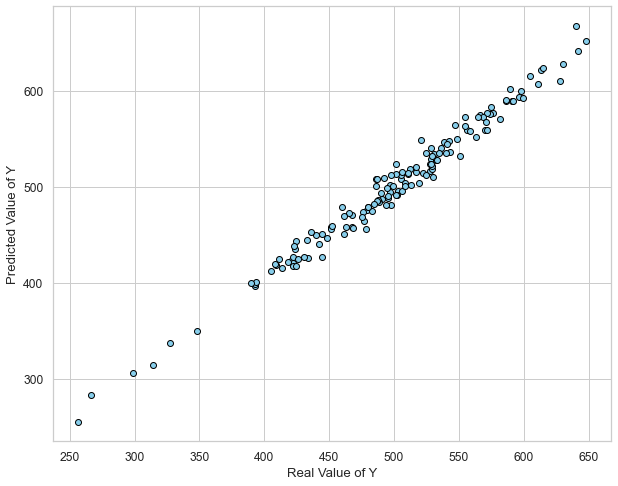

In [50]:
# Plot
plt.figure(figsize = (10,8))
plt.scatter(x = y_test, y = pred_v2, color = 'skyblue', edgecolors = 'black')
plt.xlabel('Real Value of Y')
plt.ylabel('Predicted Value of Y');

In [51]:
# MAE
mean_absolute_error(y_test, pred_v2)

7.764151148981964

In [52]:
# MSE
mean_squared_error(y_test, pred_v2)

94.93731602493463

In [53]:
# RMSE
np.sqrt(mean_squared_error(y_test, pred_v2))

9.743578194120198

In [54]:
# R2 coefficient
r2_score(y_test, pred_v2)

0.981366052994101

In [55]:
# Variance
explained_variance_score(y_test, pred_v2)

0.9817472659016085

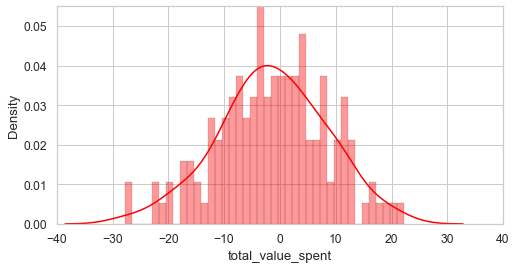

In [56]:
# Plot
plt.figure(figsize = (8,4))
ax = sns.distplot((y_test - pred_v2), 
                  bins = 40, 
                  color = 'red', 
                  hist_kws = dict(edgecolor = 'black', linewidth = 0.3))
ax.set(xlim = (-40, 40))
ax.set(ylim = (0, 0.055));

### Construction, Training and Evaluation of Model 3 with LASSO Regression

In [57]:
# Creates the model
model_v3 = Lasso(alpha = 1.0)

In [58]:
# Training
model_v3.fit(X_training, y_training)

Lasso()

In [59]:
print('coefficients: \n', model_v3.coef_)

coefficients: 
 [62.86344076 25.18747244 37.62149243  0.        ]


In [60]:
# coefficients
df_coef = pd.DataFrame(model_v3.coef_, X.columns, columns = ['coefficient'])
df_coef

,coefficient
customer_registration_time,62.863441
average_number_clicks_per_session,25.187472
total_time_logged_app,37.621492
total_time_logged_website,0.000000


In [61]:
# Test predictions
pred_v3 = model_v3.predict(X_test)
pred_v3[:10]

array([511.50216083, 591.78590214, 619.24047552, 497.55162062,
       640.89951717, 614.42803424, 590.05764493, 494.76617949,
       459.30498489, 529.64197449])

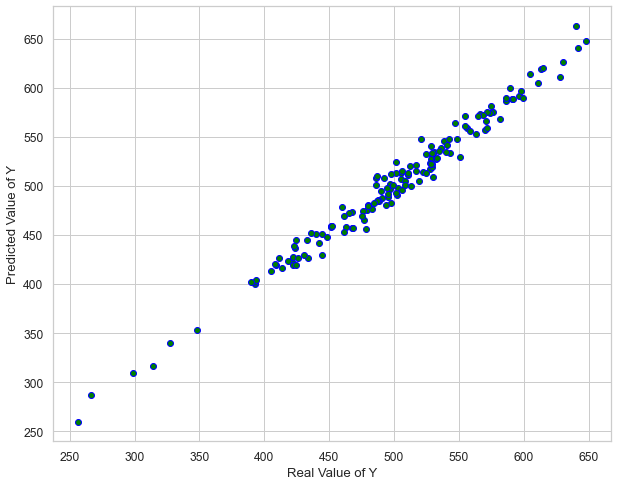

In [62]:
# Plot
plt.figure(figsize = (10,8))
plt.scatter(x = y_test, y = pred_v3, color = 'green', edgecolors = 'blue')
plt.xlabel('Real Value of Y')
plt.ylabel('Predicted Value of Y');

In [63]:
# MAE
mean_absolute_error(y_test, pred_v3)

7.788504696951063

In [64]:
# MSE
mean_squared_error(y_test, pred_v3)

96.05606348970667

In [65]:
# RMSE
np.sqrt(mean_squared_error(y_test, pred_v3))

9.800819531534426

In [66]:
# Coeficiente R2
r2_score(y_test, pred_v2)

0.981366052994101

In [67]:
# Variância Explicada
explained_variance_score(y_test, pred_v3)

0.9815600649101045

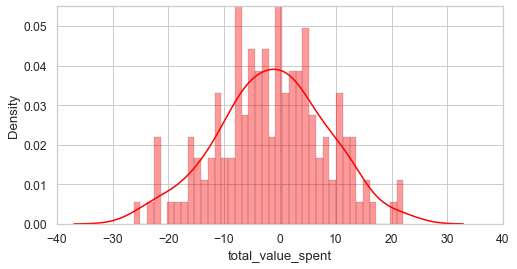

In [68]:
# Plot
plt.figure(figsize = (8,4))
ax = sns.distplot((y_test - pred_v3), 
                  bins = 40, 
                  color = 'red', 
                  hist_kws = dict(edgecolor = 'black', linewidth = 0.3))
ax.set(xlim = (-40, 40))
ax.set(ylim = (0, 0.055));

## Model selection

#### Model 3 presented a slightly higher error rate (RMSE) and can be discarded.  
#### Models 1 and 2 were very close and in this case we should choose the simplest model, which in this example is model 1.

## Conclusion

In [69]:
data.head()

,customer_registration_time,average_number_clicks_per_session,total_time_logged_app,total_time_logged_website,total_value_spent
0,3.472021,33.119954,12.953263,37.034280,534.771485
1,4.198349,35.371876,10.572467,36.862183,537.915753
2,2.086348,33.976083,11.658037,37.425279,407.876378
3,3.605934,34.034164,13.592513,36.838657,618.845970
4,4.034386,32.770492,11.371767,35.261498,502.771075


In [70]:
# Coefficients
df_coef_final = pd.DataFrame(model_v1.coef_, X.columns, columns = ['Coefficient'])
df_coef_final

,Coefficient
customer_registration_time,63.742207
average_number_clicks_per_session,26.239016
total_time_logged_app,38.571856
total_time_logged_website,0.684737


### Coefficient Interpretations:

* An increase of 1 unit in customer registration time is associated with an increase of `R$63.74` in the total value spent per customer per month.


* An increase of 1 unit in the average number of clicks per session is associated with an increase of `R$26.24` in the total amount spent per customer per month.


* An increase of 1 unit in the total time logged into the app is associated with an increase of `R$38.57` in the total amount spent per customer per month.


* An increase of 1 unit in the total time logged into the website is associated with an increase of `R$0.68` in the total amount spent per customer per month.

### We can see that it will be more profitable for the company to invest in updating its app since the return will be greater. 

#### Furthermore, it is important to create policies to retain customers for longer, as this also leads to increased sales. Updating the app itself will be a way to retain the customer for longer.

#### It is not worth, at this moment, investing in updating the website as the return will be minimal.